# Scikit-learn Exercise (10 points)

Import the file `NewYork_1980_data` from the `data` folder as a pandas dataframe called `features`. The data contains information about the adult population in New York from 1980. The goal of this exercise is to predict the income of a person based on the provided data. 

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

features = pd.read_csv('data/NewYork_1980_data.csv')
features

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0.0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0.0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0.0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0.0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0.0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0.0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0.0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0.0,20,United-States,<=50K


## Exploratory Data Analysis

Display summary statistics, and state the number of samples and features in the dataset. Are there any features for which the statistics show something unusual?

In [2]:
# Your code here
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   education       48842 non-null  object 
 3   education-num   48842 non-null  int64  
 4   marital-status  48842 non-null  object 
 5   occupation      48842 non-null  object 
 6   relationship    48842 non-null  object 
 7   race            48842 non-null  object 
 8   sex             48826 non-null  object 
 9   capital-gain    48842 non-null  int64  
 10  capital-loss    48803 non-null  float64
 11  hours-per-week  48842 non-null  int64  
 12  native-country  48842 non-null  object 
 13  income          48842 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 5.2+ MB


### Explore Column Information

Check the number of categories and counts for the `income` feature. Create a bar plot for this feature. 

In [3]:
# Your code here
features['income'].value_counts()

 <=50K    37155
 >50K     11687
Name: income, dtype: int64

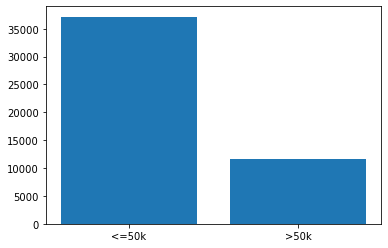

In [4]:
plt.bar([0, 1], [37155, 11687])
plt.xticks([0, 1], ['<=50k', '>50k'])
plt.show()

Check the counts for other columns. If there are any duplicate columns, remove them. 

In [5]:
# Your code here
features['age'].value_counts()
features['workclass'].value_counts()
features['education'].value_counts()
features['education-num'].value_counts()
features['marital-status'].value_counts()
features['occupation'].value_counts()
features['relationship'].value_counts()
features['race'].value_counts()
features['sex'].value_counts()
features['capital-gain'].value_counts()
features['capital-loss'].value_counts()
features['hours-per-week'].value_counts()
features['native-country'].value_counts()

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

### Handle missing values

Check if there are any missing values. If yes, for some features remove the rows with missing values, and for some features replace the missing values with the average value of the column. 

In [6]:
# Your code here
features.isnull().sum()
features.dropna(subset=['sex'], axis=0, inplace=True)
features_filled = features.fillna(features.mean(axis=0))
features_filled.isnull().sum()

/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Check Feature Distribution

Create a histogram plot of the numerical features. 

/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


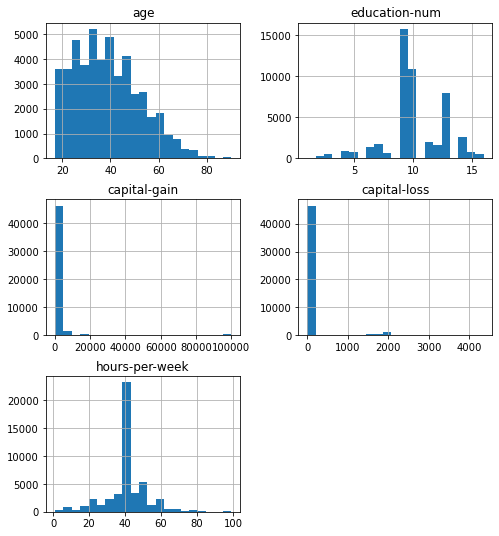

In [7]:
# Your code here
fig = plt.figure(figsize=(8, 9))
ax = fig.add_subplot(111)
features.hist(bins=21, ax=ax)
plt.show()

Plot the distributions of `age` and `hours-per-week`. Based on the plots, state the approximate average values for these two features.

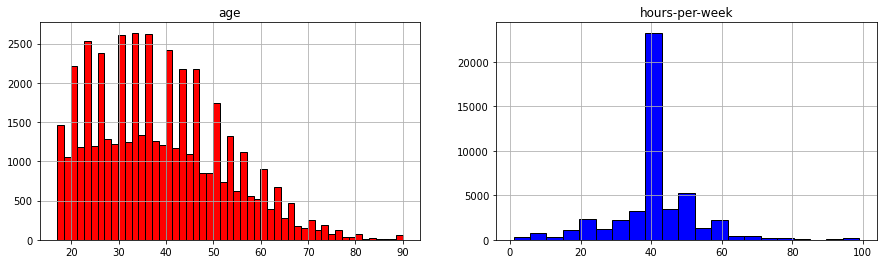

In [8]:
# Your code here
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
features['age'].hist(bins=51, ax=ax1, edgecolor='k', facecolor='r')
features['hours-per-week'].hist(bins=21, ax=ax2, edgecolor='k', facecolor='b')
ax1.set_title('age')
ax2.set_title('hours-per-week')
plt.show()

Using Seaborn, create a bar plot of the `occupation` feature with sub-bars (hue) for the `sex` feature. 

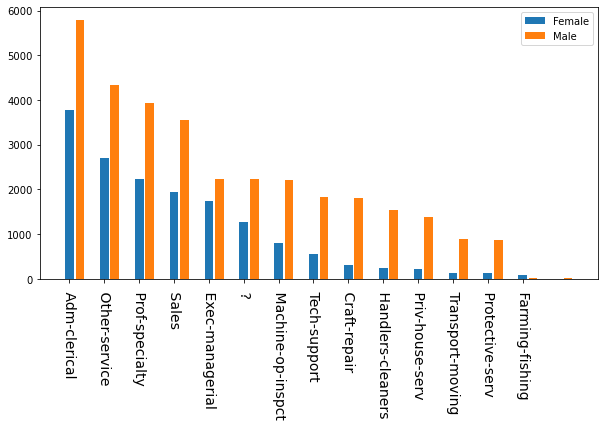

In [9]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
df = features[features['sex'].str.contains('Female')]['occupation']
dm = features[features['sex'].str.contains('Male')]['occupation']
ldf = []
ddf = []
ldm = []
ddm = []
for (k, d) in df.value_counts().items():
    ldf.append(k)
    ddf.append(d)
    
for (k, d) in dm.value_counts().items():
    ldm.append(k)
    ddm.append(d)
    
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(ddf)), ddf, width=0.25, label='Female')
plt.bar(np.arange(len(ddm))+0.3, ddm, width=0.25, label='Male')
plt.legend()
plt.xticks(np.arange(len(ldf)), ldf, fontsize=14, rotation=-90), 
plt.show()

### Check Correlated Features

Calculate the correlation between the numerical features, and plot a heatmap of the correlations. Are there any features that are highly correlated?

NameError: name 'sns' is not defined

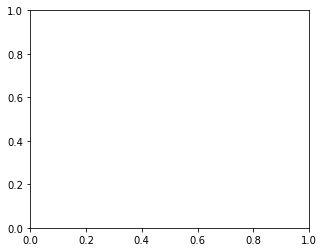

In [10]:
# Your code here
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
sns.heatmap(features.corr(), linewidths=0.05, ax=ax, cmap='bwr')
plt.show()
#why????

# Encoding Categorical Features

Use the Ordinal Encoder in scikit-learn to encode all columns with text data, except for the column `income`. 

In [11]:
# Your code here
from sklearn.preprocessing import OrdinalEncoder

categs_feats = features_filled[['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country']]

encoder = OrdinalEncoder()

categs_encoded = encoder.fit_transform(categs_feats)
features_filled[['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country']] = pd.DataFrame(categs_encoded, columns=categs_feats.columns, index=categs_feats.index)
features_filled.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4.0,1.0,7,4.0,7.0,3.0,2.0,1.0,0,0.0,40,39.0,<=50K
1,38,4.0,11.0,9,2.0,5.0,0.0,4.0,1.0,0,0.0,50,39.0,<=50K
2,28,2.0,7.0,12,2.0,11.0,0.0,4.0,1.0,0,0.0,40,39.0,>50K
3,44,4.0,15.0,10,2.0,7.0,0.0,2.0,1.0,7688,0.0,40,39.0,>50K
4,18,0.0,15.0,10,4.0,0.0,3.0,4.0,0.0,0,0.0,30,39.0,<=50K


Use the Label Encoder in scikit-learn to encode the feature `income`.

In [12]:
# Your code here
from sklearn.preprocessing import LabelEncoder
embtown_feat = features[['income']]
label_encoder = LabelEncoder()
embtown_encoded = label_encoder.fit_transform(embtown_feat)

features_filled['income'] = pd.DataFrame(embtown_encoded, columns=embtown_feat.columns, index=embtown_feat.index)
#del features_filled['income_ord']
features_filled.head()

/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4.0,1.0,7,4.0,7.0,3.0,2.0,1.0,0,0.0,40,39.0,0
1,38,4.0,11.0,9,2.0,5.0,0.0,4.0,1.0,0,0.0,50,39.0,0
2,28,2.0,7.0,12,2.0,11.0,0.0,4.0,1.0,0,0.0,40,39.0,1
3,44,4.0,15.0,10,2.0,7.0,0.0,2.0,1.0,7688,0.0,40,39.0,1
4,18,0.0,15.0,10,4.0,0.0,3.0,4.0,0.0,0,0.0,30,39.0,0


# Scaling Numerical Features

Create target labels named `y` consisting of the `income` column, and a data label named `X` including all remaining columns.

In [13]:
# Your code here
X = features_filled.drop('income', axis=1)
y = features_filled['income']
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,4.0,1.0,7,4.0,7.0,3.0,2.0,1.0,0,0.0,40,39.0
1,38,4.0,11.0,9,2.0,5.0,0.0,4.0,1.0,0,0.0,50,39.0
2,28,2.0,7.0,12,2.0,11.0,0.0,4.0,1.0,0,0.0,40,39.0
3,44,4.0,15.0,10,2.0,7.0,0.0,2.0,1.0,7688,0.0,40,39.0
4,18,0.0,15.0,10,4.0,0.0,3.0,4.0,0.0,0,0.0,30,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4.0,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0.0,38,39.0
48838,40,4.0,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0.0,40,39.0
48839,58,4.0,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0.0,40,39.0
48840,22,4.0,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0.0,20,39.0


Use standardization to scale all columns in the data X to have 0 mean and 1 standard deviation. 

In [14]:
# Your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Split the data and targets into train and test sets, where the test set will be 25% of all data. Print the shapes of the train and test sets. 

In [15]:
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y)
print('Training data inputs', X_train.shape)
print('Training labels', y_train.shape)
print('Testing data inputs', X_test.shape)
print('Testing labels', y_test.shape)

Training data inputs (36619, 13)
Training labels (36619,)
Testing data inputs (12207, 13)
Testing labels (12207,)


# Training Classifiers

Train all 8 studied classifiers on the training set and evaluate the accuracy on the test set. Use the default values for the classifiers, unless instructed otherwise in the following lines. 
They include:
- k-Nearest Neighbors
- SVM (use the linear kernel)
- Logistic Regression
- Decision Trees
- Random Forest (use at least 50 estimators)
- Naive Bayes (GaussianNB)
- Perceptron (try different number of epochs and learning rate)
- SGD (use 'hinge' loss, at least 50 iterations)

Report which models have the best performance.

In [16]:
# Your code here
# Your code here
from sklearn import neighbors

knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
accuracy = knn_model.score(X_test, y_test)
print('The test accuracy of k-Nearest Neighbors is {0:5.2f} %'.format(accuracy*100))

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=1)
lr_model.fit(X_train, y_train)
accuracy = lr_model.score(X_test, y_test)
print('The test accuracy of Logistic Regression is {0:5.2f} %'.format(accuracy*100))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model_1 = DecisionTreeClassifier(criterion='gini', max_depth=4)
tree_model_1.fit(X_train, y_train)
tree_pred = tree_model_1.predict(X_test)
accuracy = accuracy_score(y_test, tree_pred)
print('The test accuracy of DecisionTree is {0:5.2f} %'.format(accuracy*100))

from sklearn.linear_model import Perceptron

ppn_model_1 = Perceptron(max_iter=40, eta0=0.1)
ppn_model_1.fit(X_train, y_train)
ppn_pred = ppn_model_1.predict(X_test)
accuracy = accuracy_score(y_test, ppn_pred)
print('The test accuracy of Perceptron is {0:5.2f} %'.format(accuracy*100))

The test accuracy of k-Nearest Neighbors is 82.92 %
The test accuracy of Logistic Regression is 82.15 %
The test accuracy of DecisionTree is 84.06 %
The test accuracy of Perceptron is 71.39 %


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)

rf_model.fit(X_train, y_train)
accuracy = rf_model.score(X_test, y_test)
print('The test accuracy of Random Forest is {0:5.2f} %'.format(accuracy*100))

from sklearn.svm import LinearSVC

lin_svm = LinearSVC()
lin_svm.fit(X_train, y_train)
linsvm_pred = lin_svm.predict(X_test)
accuracy = lin_svm.score(X_test, y_test)
print('The test accuracy of SVM is {0:5.2f} %'.format(accuracy*100))

from sklearn.naive_bayes import GaussianNB

nb_model_1 = GaussianNB()
nb_model_1.fit(X_train, y_train)
nb_pred = nb_model_1.predict(X_test)
accuracy = accuracy_score(y_test, nb_pred)
print('The test accuracy of naive bayes is {0:5.2f} %'.format(accuracy*100))

from sklearn.linear_model import SGDClassifier

sgd_model_1 = SGDClassifier(max_iter=80, loss='hinge', random_state=1)
sgd_model_1 .fit(X_train, y_train)
sgd_pred = sgd_model_1 .predict(X_test)
accuracy = accuracy_score(y_test, sgd_pred)
print('The test accuracy of SGD is {0:5.2f} %'.format(accuracy*100))

The test accuracy of Random Forest is 84.99 %
The test accuracy of SVM is 81.82 %
The test accuracy of naive bayes is 80.07 %
The test accuracy of SGD is 82.29 %


/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# Dimensionality Reduction

Apply PCA to the training dataset, and plot the cumulative explained variance ratio.

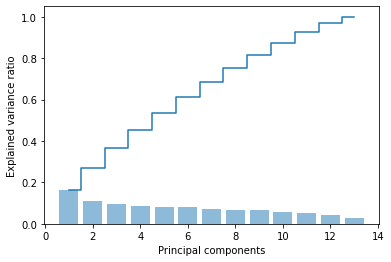

In [18]:
# Your code here
from sklearn.decomposition import PCA
pca = PCA()
X_reduced = pca.fit_transform(X_train)
pca.explained_variance_ratio_
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

Find the number of principal components that explain more than 75% of the variance in the train data.

In [19]:
# Your code here
pca_3 = PCA(n_components=0.75)
X_reduced = pca_3.fit_transform(X_train)
pca_3.n_components_

8

Use the found number of components to reduce the dimensionality of the dataset. Afterwards, train three models that achieved the highest accuracy in the previous section, and report the accuracy on the dataset with reduced dimensionality. Report if there is decrease in accuracy using the reduced dataset. 

In [20]:
# Your code here
pca_8 = PCA(n_components=9)
X_train_8dim = pca_8.fit_transform(X_train)
X_test_8dim = pca_8.transform(X_test)
print(X_train_8dim.shape)
print(X_test_8dim.shape)

knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_8dim, y_train)
accuracy = knn_model.score(X_test_8dim, y_test)
print('The test accuracy of k-Nearest Neighbors is {0:5.2f} %'.format(accuracy*100))

tree_model_1 = DecisionTreeClassifier(criterion='gini', max_depth=4)
tree_model_1.fit(X_train_8dim, y_train)
tree_pred = tree_model_1.predict(X_test_8dim)
accuracy = accuracy_score(y_test, tree_pred)
print('The test accuracy of DecisionTree is {0:5.2f} %'.format(accuracy*100))

rf_model = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)
rf_model.fit(X_train_8dim, y_train)
accuracy = rf_model.score(X_test_8dim, y_test)
print('The test accuracy of Random Forest is {0:5.2f} %'.format(accuracy*100))

(36619, 9)
(12207, 9)
The test accuracy of k-Nearest Neighbors is 83.35 %
The test accuracy of DecisionTree is 80.83 %
The test accuracy of Random Forest is 83.76 %


Explain briefly the advantages of dimensionality reduction with PCA.

# Hyperparameter Tuning

For the two best-performing approaches on the reduced dataset with PCA, perform hyperparameter tuning. Use a grid search for one approach with at least 5 values, and a random search for the other approach with at least 10 samples from the distribution. Choose between 1 and 3 hyperparameters, based on the used classifier.

In [26]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
hyper_grid = {'n_neighbors': [5, 10, 15, 20,25]}
grid_search = GridSearchCV(knn_model, hyper_grid, scoring='accuracy')
results = grid_search.fit(X_train_8dim, y_train)
print(results.best_score_)
print(results.best_params_)

0.8410114418462499
{'n_neighbors': 15}


In [27]:
from sklearn.model_selection import GridSearchCV

tree_model_1 = DecisionTreeClassifier(criterion='gini', max_depth=4)
hyper_grid = {'max_depth': [1, 2, 3, 4,5]}
grid_search = GridSearchCV(rf_model, hyper_grid, scoring='accuracy')
results = grid_search.fit(X_train_8dim, y_train)
print(results.best_score_)
print(results.best_params_)

0.8271933747864122
{'max_depth': 5}


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_8dim, y_train)
hyper_distributions = {'n_neighbors': randint(5, 20)}
random_search = RandomizedSearchCV(knn_model, hyper_distributions, n_iter=40, scoring='accuracy')
results = random_search.fit(X_train_8dim, y_train)

print('Accuracy:',results.best_score_)
print('Hyperparameters:', results.best_params_)

Accuracy: 0.8413664353864995
Hyperparameters: {'n_neighbors': 14}


# Cross-Validation

For the best performing method in the previous section, use 5-fold cross-validation to calculate the accuracy, and report the mean and standard deviation. 

In [29]:
# Your code here
from sklearn.model_selection import cross_validate
rf_model = RandomForestClassifier(n_estimators=56, max_depth=9, min_samples_leaf=3, random_state=123)
cv_result = cross_validate(rf_model, X_train, y_train, cv=5)
cv_result

{'fit_time': array([0.48013806, 0.47441602, 0.48144913, 0.48052502, 0.47839594]),
 'score_time': array([0.02875996, 0.02890801, 0.02874589, 0.02852893, 0.02853107]),
 'test_score': array([0.85567996, 0.85199345, 0.86510104, 0.86086838, 0.85361191])}

In [30]:
scores = cv_result["test_score"]
print("The mean of the cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean of the cross-validation accuracy is: 0.857 +/- 0.005
